# Graduate Admission Dataset

In [1]:
# importing required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
df = pd.read_csv('datasets/Admission_Predict.csv')
df.shape

(400, 9)

In [3]:
# view top 5 rows
df.head().T

,0,1,2,3,4
Serial No.,1.00,2.00,3.00,4.00,5.00
GRE Score,337.00,324.00,316.00,322.00,314.00
TOEFL Score,118.00,107.00,104.00,110.00,103.00
University Rating,4.00,4.00,3.00,3.00,2.00
SOP,4.50,4.00,3.00,3.50,2.00
LOR,4.50,4.50,3.50,2.50,3.00
CGPA,9.65,8.87,8.00,8.67,8.21
Research,1.00,1.00,1.00,1.00,0.00
Chance of Admit,0.92,0.76,0.72,0.80,0.65


In [4]:
# renaming feature
df = df.rename(columns={'Chance of Admit ':'Chance of Admit', 'LOR ': 'LOR'})

The column name `Chance of Admit` and `LOR` had a space at the end

In [5]:
# check features info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


There are no missing values

In [6]:
# view statistical details
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,400.0,200.500000,115.614301,1.00,100.75,200.50,300.2500,400.00
GRE Score,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL Score,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
University Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Research,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00
Chance of Admit,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97


In [7]:
# dropping redundant feature
df.drop('Serial No.', axis=1, inplace=True)
df.shape

(400, 8)

### Outlier Treatment

In [8]:
# importing required packages
from collections import Counter

In [9]:
# helper function to detect outliers
def check_for_outliers(df, features, no_of_outliers=2):
    outlier_indices = []
    for feature in features:
        # compute interquartile range (IQR)
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # determine a list of indices of outliers for feature
        outliers_list = df[(df[feature] < Q1 - outlier_step) | 
                           (df[feature] > Q3 + outlier_step )].index
        
        # append the found outlier to list of outlier indices
        outlier_indices.extend(outliers_list)
        
    print(f'select observations containing more than {no_of_outliers} outliers')
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > no_of_outliers)
    
    return multiple_outliers

In [10]:
# get outlier indecies to drop
outliers_to_drop = check_for_outliers(df, df.columns.tolist())
outliers_to_drop

select observations containing more than 2 outliers


[]

### EDA

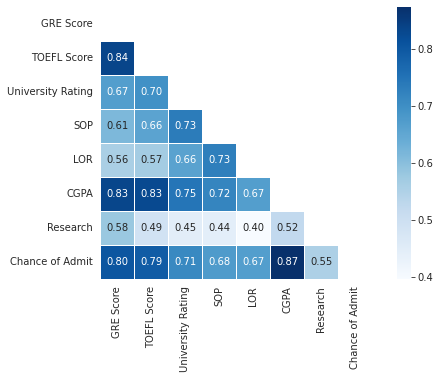

In [11]:
# plotting correlation heatmap
data = df.copy()
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    figure, ax = plt.subplots(figsize=(9,5))
    ax = sns.heatmap(data.corr(), mask=mask, square=True, annot=True, 
                     fmt='0.2f', linewidths=.8, cmap='Blues')

`Chance of Admit` is highly correlated with `CGPA`. `GRE` and `TOEFL` scores are also correlated.

In [12]:
# get numerical features
numerical_features = df.describe().columns
numerical_features

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [13]:
# check features value counts
data = df.copy()
for feature in ['University Rating', 'SOP', 'LOR', 'Research']:
    print(data[feature].value_counts())
    print('*'*50, end='\n')

3    133
2    107
4     74
5     60
1     26
Name: University Rating, dtype: int64
**************************************************
4.0    70
3.5    70
3.0    64
4.5    53
2.5    47
5.0    37
2.0    33
1.5    20
1.0     6
Name: SOP, dtype: int64
**************************************************
3.0    85
4.0    77
3.5    73
4.5    45
2.5    39
2.0    38
5.0    35
1.5     7
1.0     1
Name: LOR, dtype: int64
**************************************************
1    219
0    181
Name: Research, dtype: int64
**************************************************


Features like `University Rating`, `SOP`, `LOR` and `Research` are categorical in nature.

In [14]:
# helper function to plot distribution plot
def plot_dist_plot(features, no_of_rows=2, no_of_columns=2):
    fig = plt.figure(figsize=(12,10))
    grid = plt.GridSpec(no_of_rows, no_of_columns, wspace=.25, hspace=.25)
    for index in range(no_of_rows*no_of_columns):
        exec(f"plt.subplot(grid{[index]})")
        sns.distplot(df[features[index]], kde=True, color='b', rug=True)
        plt.title(f'Distribution of {features[index]}')
        plt.tight_layout()

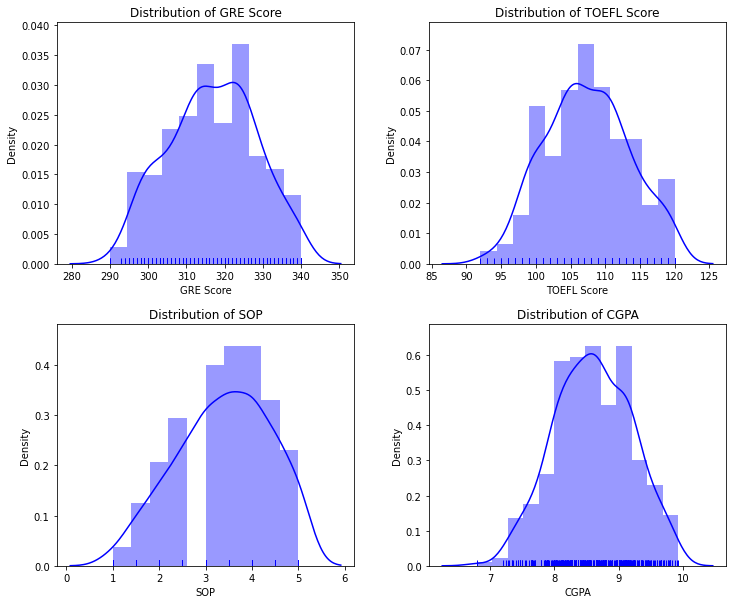

In [15]:
# view data distributions
plot_dist_plot(['GRE Score', 'TOEFL Score', 'SOP', 'CGPA'])

It is clear from the distributions, students with varied merit apply for the university.

In [16]:
# analyse GRE score
gre_score = df.groupby(['University Rating']).agg({'GRE Score': ['mean']})
gre_score.reset_index()

,University Rating,GRE Score
,,mean
0,1,303.153846
1,2,309.177570
2,3,315.954887
3,4,324.824324
4,5,328.333333


As we can see mean GRE score increases as the university rating increases.

In [17]:
# analyse TOEFL score
toefl_score = df.groupby(['University Rating']).agg({'TOEFL Score': ['mean']})
toefl_score.reset_index()

,University Rating,TOEFL Score
,,mean
0,1,99.076923
1,2,103.523364
2,3,106.887218
3,4,111.824324
4,5,113.666667


In [18]:
# analyse TOEFL score
student_cgpa = df.groupby(['University Rating']).agg({'CGPA': ['mean']})
student_cgpa.reset_index()

,University Rating,CGPA
,,mean
0,1,7.745769
1,2,8.183738
2,3,8.552256
3,4,9.021622
4,5,9.291167


Similar trend shown for features `TOEFL Score` and `CGPA`.

In [19]:
# helper function to perform univariate analysis
def perform_univariate_analysis(data, feature):
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.15, .85)})
    sns.boxplot(data=data, x=feature, ax=ax_box)
    sns.histplot(data=data, x=feature, ax=ax_hist, kde=True)
    ax_box.set(xlabel='')
    plt.show()

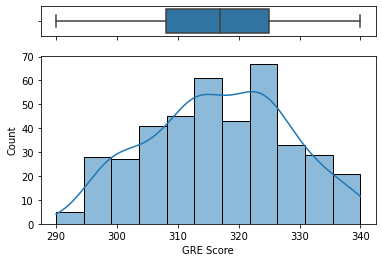

In [20]:
# analyse GRE Score
perform_univariate_analysis(df, 'GRE Score')

* Average GRE score is around 318
* 25% of scores are less than 309
* 75% of scores are less than 325

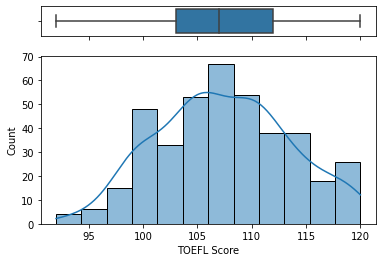

In [21]:
# analyse TOEFL Score
perform_univariate_analysis(df, 'TOEFL Score')

* Average TOEFL score is around 107
* 25% of scores are less than 104
* 75% of scores are less than 112

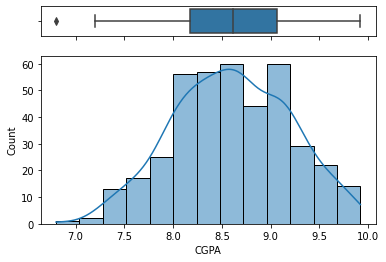

In [22]:
# analyse CGPA
perform_univariate_analysis(df, 'CGPA')

* Average CGPA is around 8.6
* 25% of CGPA are less than 8.1
* 75% of CGPA are less than 9.1

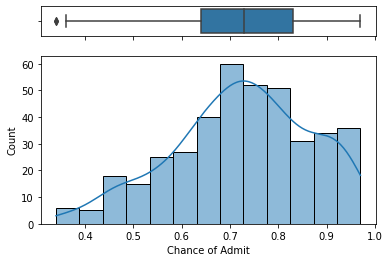

In [23]:
# analyse Chance of Admit
perform_univariate_analysis(df, 'Chance of Admit')

* Average Chance of Admit is around 0.73
* 25% of Chance of Admit are less than 0.65
* 75% of Chance of Admit are less than 0.83

In [24]:
def perform_bivariate_analysis(x_feature, plot_type='box', y_feature='Chance of Admit', 
                               hue='Research', enable_hue=False):
    if plot_type == 'box':
        sns.boxplot(x=x_feature, y=y_feature, data=df)
    if plot_type == 'scatter':
        sns.scatterplot(x=x_feature, y=y_feature, data=df, hue=hue)
    if plot_type == 'regplot':
        sns.regplot(x=x_feature, y=y_feature, data=df)
    if plot_type == 'lmplot':
        sns.lmplot(x=x_feature, y=y_feature, data=df, hue=hue)
    plt.title(f'{x_feature} vs {y_feature}')
    plt.show()

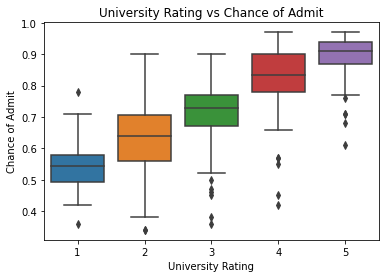

In [25]:
perform_bivariate_analysis('University Rating')

As we can see average chance of admit increases as university rating increases.

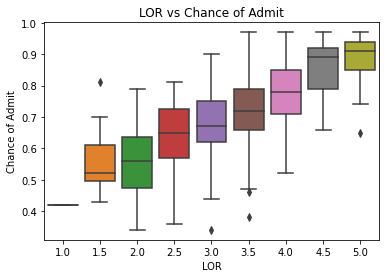

In [26]:
perform_bivariate_analysis('LOR')

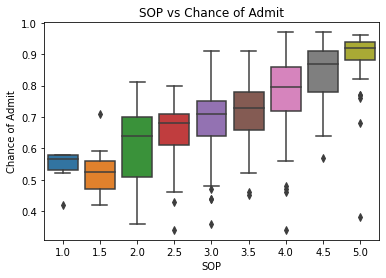

In [27]:
perform_bivariate_analysis('SOP')

Similar treands are observed for features `LOR` and `SOP`.

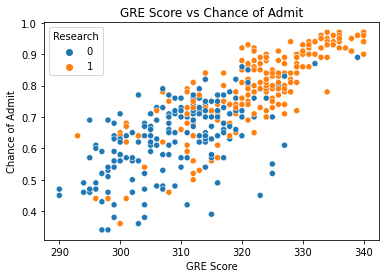

In [28]:
perform_bivariate_analysis('GRE Score', plot_type='scatter')

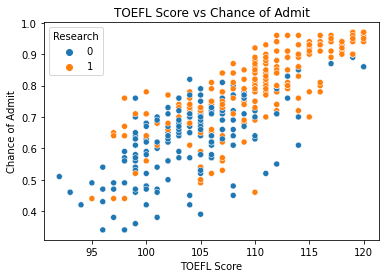

In [29]:
perform_bivariate_analysis('TOEFL Score', plot_type='scatter')

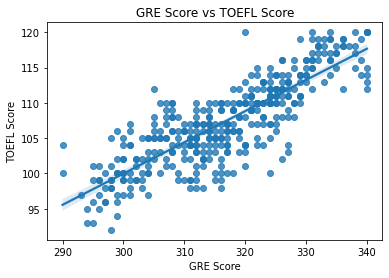

In [30]:
perform_bivariate_analysis(x_feature='GRE Score', y_feature='TOEFL Score', plot_type='regplot')

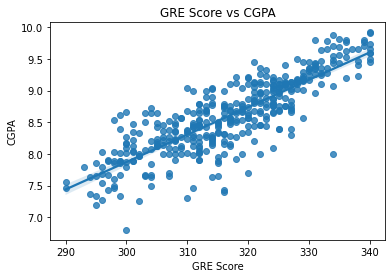

In [31]:
perform_bivariate_analysis(x_feature='GRE Score', y_feature='CGPA', plot_type='regplot')

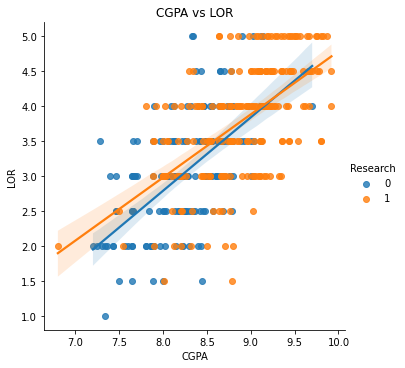

In [32]:
perform_bivariate_analysis(x_feature='CGPA', y_feature='LOR', plot_type='lmplot')

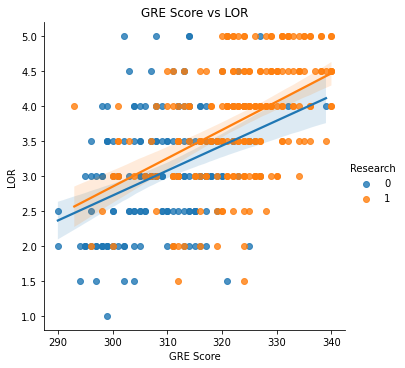

In [33]:
perform_bivariate_analysis(x_feature='GRE Score', y_feature='LOR', plot_type='lmplot')

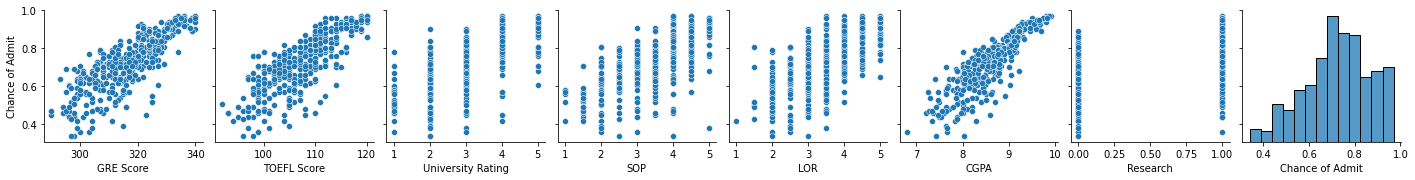

In [34]:
# checking relationship of target variable with independent variables
sns.pairplot(df, y_vars=['Chance of Admit'])
plt.show()

In [35]:
# importing required packages
from scipy import stats

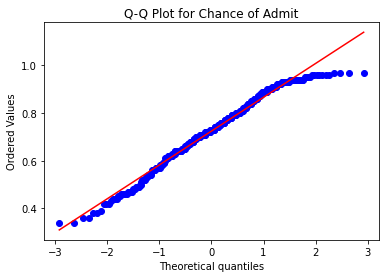

In [36]:
# plotting Q-Q plot
stats.probplot(df['Chance of Admit'], plot=plt, dist='norm')
plt.title('Q-Q Plot for Chance of Admit')
plt.show()

Data is almost along the line which means the data is almost normal.

### Model Builing

In [37]:
# importing required packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [38]:
# put predictors in X and target in y
X = df.drop('Chance of Admit', axis=1)
y = df['Chance of Admit']

In [39]:
# perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [40]:
# scale features
scaler = StandardScaler()
X_train[X.columns] = scaler.fit_transform(X_train[X.columns])
X_test[X.columns] = scaler.transform(X_test[X.columns])

In [41]:
# build model
X_train_sm = sm.add_constant(X_train)
sm_model = sm.OLS(y_train, X_train_sm).fit()
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     175.8
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          2.90e-104
Time:                        09:13:08   Log-Likelihood:                 430.07
No. Observations:                 320   AIC:                            -844.1
Df Residuals:                     312   BIC:                            -814.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7294      0.004    204.166      0.000       0.722       0.736
GRE Score             0.0192      0.008      2.559      0.011       0.004       0.034
TOEFL Score           0.0178      0.007      2.526      0.012       0.004       0.032
University Rating     0.0100      0.006      1.697      0.091      -0.002       0.022
SOP                  -0.0054      0.006     -0.924      0.356      -0.017       0.006
LOR                   0.0244      0.005      4.500      0.000       0.014       0.035
CGPA                  0.0676      0.008      8.595      0.000       0.052       0.083
Research              0.0093      0.004      2.150      0.032       0.001       0.018
==============================================================================
Omnibus:                       81.645   Durbin-Watson:                   0.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.395
Skew:                          -1.309   Prob(JB):                     2.71e-37
Kurtosis:                       5.402   Cond. No.                         5.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# re-build model
X_train = X_train.drop('SOP', axis=1)
X_train_sm = sm.add_constant(X_train)
sm_model = sm.OLS(y_train, X_train_sm).fit()
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     205.0
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          2.97e-105
Time:                        09:13:08   Log-Likelihood:                 429.64
No. Observations:                 320   AIC:                            -845.3
Df Residuals:                     313   BIC:                            -818.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7294      0.004    204.214      0.000       0.722       0.736
GRE Score             0.0194      0.007      2.593      0.010       0.005       0.034
TOEFL Score           0.0171      0.007      2.443      0.015       0.003       0.031
University Rating     0.0084      0.006      1.495      0.136      -0.003       0.019
LOR                   0.0224      0.005      4.519      0.000       0.013       0.032
CGPA                  0.0668      0.008      8.547      0.000       0.051       0.082
Research              0.0092      0.004      2.118      0.035       0.001       0.018
==============================================================================
Omnibus:                       82.747   Durbin-Watson:                   0.706
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.851
Skew:                          -1.324   Prob(JB):                     4.82e-38
Kurtosis:                       5.425   Cond. No.                         5.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# re-build model
X_train = X_train.drop('University Rating', axis=1)
X_train_sm = sm.add_constant(X_train)
sm_model = sm.OLS(y_train, X_train_sm).fit()
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     244.6
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          5.46e-106
Time:                        09:13:08   Log-Likelihood:                 428.50
No. Observations:                 320   AIC:                            -845.0
Df Residuals:                     314   BIC:                            -822.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7294      0.004    203.814      0.000       0.722       0.736
GRE Score       0.0199      0.008      2.652      0.008       0.005       0.035
TOEFL Score     0.0186      0.007      2.688      0.008       0.005       0.032
LOR             0.0249      0.005      5.316      0.000       0.016       0.034
CGPA            0.0695      0.008      9.123      0.000       0.055       0.085
Research        0.0095      0.004      2.204      0.028       0.001       0.018
==============================================================================
Omnibus:                       79.930   Durbin-Watson:                   0.715
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.783
Skew:                          -1.292   Prob(JB):                     7.40e-36
Kurtosis:                       5.335   Cond. No.                         4.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# importing required packages
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
# check VIF's
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, index) for index in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,CGPA,4.53
0,GRE Score,4.39
1,TOEFL Score,3.75
2,LOR,1.71
4,Research,1.46


In [46]:
# getting predictions
y_train_pred = sm_model.predict(X_train_sm)
y_train_pred

0      0.952960
1      0.802493
2      0.646877
3      0.728085
4      0.632092
         ...   
315    0.607928
316    0.527686
317    0.556975
318    0.736178
319    0.762732
Length: 320, dtype: float64

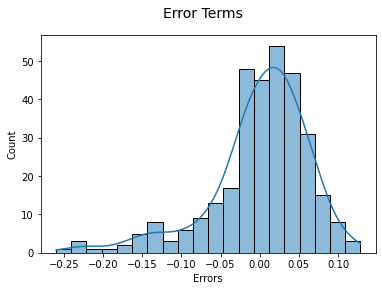

In [47]:
# plotting residuals
fig = plt.figure()
sns.histplot((y_train - y_train_pred), bins=20, kde=True)
fig.suptitle('Error Terms', fontsize=14)
plt.xlabel('Errors', fontsize=10)
plt.show()

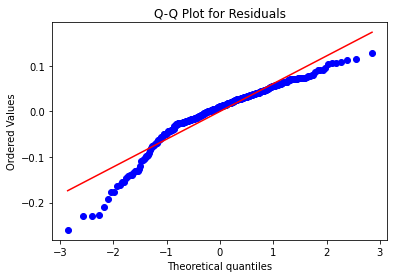

In [48]:
# plotting Q-Q plot for residuals
stats.probplot((y_train - y_train_pred), plot=plt, dist='norm')
plt.title('Q-Q Plot for Residuals')
plt.show()

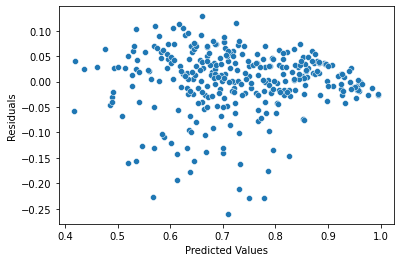

In [49]:
# plotting scatter plots for residuals
sns.scatterplot(x=y_train_pred, y=(y_train - y_train_pred))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

### Making Prediction on Test Set

In [50]:
# get predictions
X_test_sm = sm.add_constant(X_test.drop(columns=['SOP', 'University Rating'], axis=1))
X_test_pred = sm_model.predict(X_test_sm)
X_test_pred

320    0.714651
321    0.725873
322    0.679938
323    0.595462
324    0.637230
         ...   
395    0.804008
396    0.804762
397    0.910493
398    0.724886
399    0.929907
Length: 80, dtype: float64

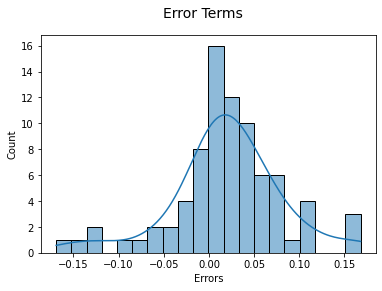

In [51]:
# plotting residuals
fig = plt.figure()
sns.histplot((y_test - X_test_pred), bins=20, kde=True)
fig.suptitle('Error Terms', fontsize=14)
plt.xlabel('Errors', fontsize=10)
plt.show()

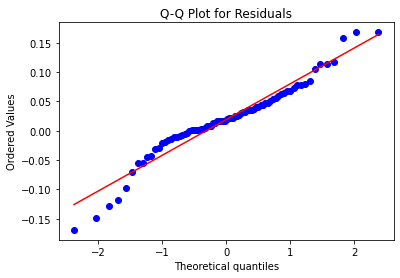

In [52]:
# plotting Q-Q plot for residuals
stats.probplot((y_test - X_test_pred), plot=plt, dist='norm')
plt.title('Q-Q Plot for Residuals')
plt.show()

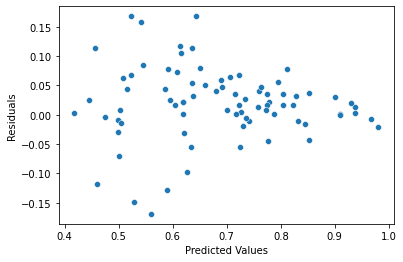

In [53]:
# plotting scatter plots for residuals
sns.scatterplot(x=X_test_pred, y=(y_test - X_test_pred))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [54]:
# importing required packages
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [55]:
# get r-squared for test data
r_squared = r2_score(y_test, X_test_pred)
r_squared

0.8155530429466225

In [56]:
# get RMSE
np.sqrt(mean_squared_error(y_test, X_test_pred))

0.06394171935070009

## Regression - Multiple Algorithms

In [57]:
# importing required packages
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR,SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, mean_squared_error

In [58]:
# perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [59]:
# create regressors
regressors=[['Linear Regression :', LinearRegression()],
       ['Decision Tree Regression :', DecisionTreeRegressor()],
       ['Random Forest Regression :', RandomForestRegressor()],
       ['Gradient Boosting Regression :', GradientBoostingRegressor()],
       ['Ada Boosting Regression :', AdaBoostRegressor()],
       ['Extra Tree Regression :', ExtraTreesRegressor()],
       ['K-Neighbors Regression :', KNeighborsRegressor()],
       ['Support Vector Regression :', SVR()]]

In [60]:
# get predictions
reg_pred = []
for name, model in regressors:
    model = model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    reg_pred.append(rmse)
    print(name, rmse)

Linear Regression : 0.06473311695782084
Decision Tree Regression : 0.09278334979941176
Random Forest Regression : 0.07083502576409498
Gradient Boosting Regression : 0.06647862365914517
Ada Boosting Regression : 0.08161508376041558
Extra Tree Regression : 0.07146216568926522
K-Neighbors Regression : 0.07911794992288412
Support Vector Regression : 0.08180727044650482


In [61]:
y_ax = ['Linear Regression' ,'Decision Tree Regression', 'Random Forest Regression','Gradient Boosting Regression', 
        'Ada Boosting Regression','Extra Tree Regression' ,'K-Neighbors Regression', 'Support Vector Regression' ]
x_ax = reg_pred

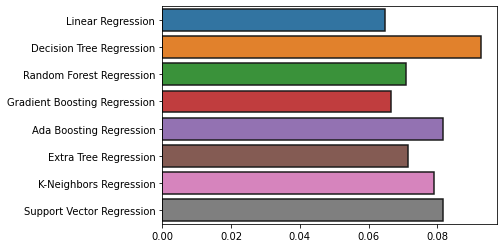

In [62]:
sns.barplot(x=x_ax, y=y_ax, linewidth=1.5, edgecolor='0.1')
plt.show()

## Classification - Multiple Algorithms

In [63]:
# perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [64]:
# if Chance of Admit greater than 80% we classify it as 1
y_train = [1 if each > 0.8 else 0 for each in y_train]
y_test  = [1 if each > 0.8 else 0 for each in y_test]

In [65]:
# define classifiers
classifiers=[['Logistic Regression :',LogisticRegression()],
       ['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Random Forest Classification :',RandomForestClassifier()],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['Ada Boosting Classification :',AdaBoostClassifier()],
       ['Extra Tree Classification :', ExtraTreesClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier()],
       ['Support Vector Classification :',SVC()],
       ['Gausian Naive Bayes :',GaussianNB()]]

In [66]:
# get predictions
cla_pred=[]
for name, model in classifiers:
    model = model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    cla_pred.append(accuracy_score(y_test, predictions))
    print(name, accuracy_score(y_test, predictions))

Logistic Regression : 0.9
Decision Tree Classification : 0.875
Random Forest Classification : 0.925
Gradient Boosting Classification : 0.925
Ada Boosting Classification : 0.8875
Extra Tree Classification : 0.9
K-Neighbors Classification : 0.8625
Support Vector Classification : 0.7375
Gausian Naive Bayes : 0.95


In [67]:
y_ax=['Logistic Regression' ,
      'Decision Tree Classifier',
      'Random Forest Classifier',
      'Gradient Boosting Classifier',
      'Ada Boosting Classifier',
      'Extra Tree Classifier' ,
      'K-Neighbors Classifier',
      'Support Vector Classifier',
       'Gaussian Naive Bayes']
x_ax=cla_pred

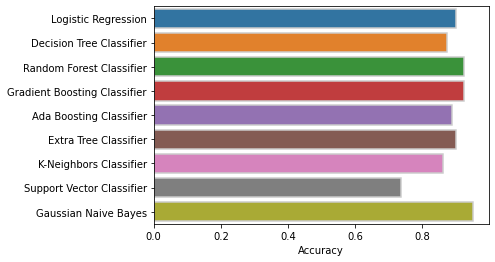

In [68]:
sns.barplot(x=x_ax, y=y_ax, linewidth=1.5, edgecolor='0.8')
plt.xlabel('Accuracy')
plt.show()